In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split



df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)
X = df.loc[:,2:].values
y = df.loc[:,1].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [2]:
#le.transform(['M']) #用来查看数据被标记为数字的对应关系。
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline #把多个操作串起来
from sklearn.metrics import accuracy_score
#from sklearn.feature_selection.from_model import 

pipe_lr = Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=2)),
                    ('clf',LogisticRegression(random_state=1,penalty='l2'))])

pipe_lr.fit_transform(X_train,y_train)
print('Train Accuracy is %2f' % pipe_lr.score(X_train,y_train))
print('Test Accuracy is %2f' % pipe_lr.score(X_test,y_test))

Train Accuracy is 0.953846
Test Accuracy is 0.947368


/home/lzjqsdd/APP/anaconda3/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
from sklearn.cross_validation import StratifiedKFold
import numpy as np

'''
kfold  = StratifiedKFold(y=y_train,n_folds=10,random_state=1)
scores = []
for k,(train,test) in enumerate(kfold):
    pipe_lr.fit_transform(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('%d fold,Class dist.:%s  Accuracy %.3f' % (k+1,
                                    np.bincount(y_train[train]),
                                    score))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
'''

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                     X=X_train,
                     y=y_train,
                     n_jobs=1,
                     cv = 10)


print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.950 +/- 0.029


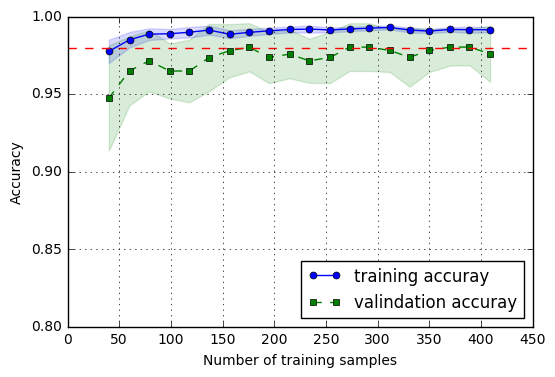

In [4]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

pipe_lr = Pipeline([
        ('scl',StandardScaler()),
        ('clf',LogisticRegression(penalty='l2',random_state=0))
    ])


# 参数中的train_sizes表示每次使用的训练样本的占传递进来的X的比例
train_sizes,train_scores,test_scores = \
learning_curve(estimator=pipe_lr,X=X_train,y=y_train,
                  train_sizes=np.linspace(0.1,1,20),
                  cv=10,
                  n_jobs=1)
    
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,
        color='blue',marker='o',
        markersize=5,
        label='training accuray')

plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,color='blue')

plt.plot(train_sizes,test_mean,
        color='green',linestyle='--',
        marker='s',markersize=5,
        label='valindation accuray')

plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.axhline(y=0.98,linestyle='--',color='r')
plt.ylim([0.8,1.0])
plt.show()

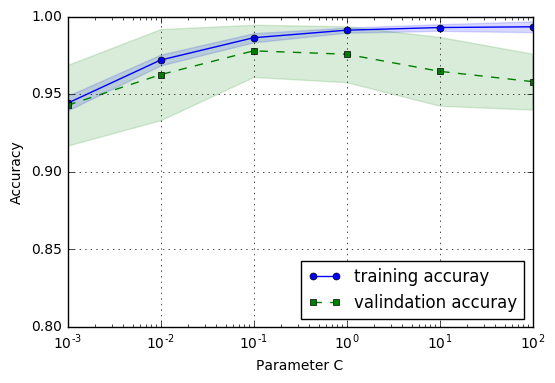

In [5]:
## 这次不是调节每次使用的训练数据的大小，而是调节参数

import matplotlib.pyplot as plt
from sklearn.learning_curve import validation_curve

pipe_lr = Pipeline([
        ('scl',StandardScaler()),
        ('clf',LogisticRegression(penalty='l2',random_state=0))
    ])



param_range = [0.001,0.01,0.1,1.0,10,100]
train_scores,test_scores = \
validation_curve(estimator=pipe_lr,X=X_train,y=y_train,param_name='clf__C',param_range=param_range,cv=10)

    
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(param_range,train_mean,
        color='blue',marker='o',
        markersize=5,
        label='training accuray')

plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,color='blue')

plt.plot(param_range,test_mean,
        color='green',linestyle='--',
        marker='s',markersize=5,
        label='valindation accuray')

plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15,color='green')

plt.grid()
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
#plt.axhline(y=0.98,linestyle='--',color='r')
plt.xscale('log')
plt.ylim([0.8,1.0])
plt.show()

In [6]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([
        ('scl',StandardScaler()),
        ('clf',SVC(random_state=1))
    ])

param_range = [0.001,0.01,0.1,1.0,10.0,100.0]
'''
param_grid = [
    {
        'clf__C':param_range,
        'clf__kernel':['linear']
    }
    ,{
        'clf__C':param_range,
        'clf__kernel':['rbf'],
        'clf__gamma':param_range
    }]
'''

#下面这种方法搜索次数多，因为gamma参数只对rbf有用。没必要在kernel为linear是搜索。
param_grid = {
    'clf__C':param_range,
    'clf__kernel':('linear','rbf'),
    'clf__gamma':param_range
}

gs = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                 scoring = 'accuracy',
                 cv=10,
                 n_jobs=-1)

gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.978021978022
{'clf__gamma': 0.001, 'clf__C': 0.1, 'clf__kernel': 'linear'}


In [7]:
#接下来使用gridcv得到的最佳参数来在test_data上测试泛化误差

clf = gs.best_estimator_
clf.fit(X_train,y_train)
print ('Test Accuracy is %.3f' % clf.score(X_test,y_test))

Test Accuracy is 0.965


In [8]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)

#estimator=gs,外层为cross_val_score的5层k-fold,内层为gs，为10层k-fold
scores = cross_val_score(gs,X,y,scoring='accuracy',cv=5)
print('CV Accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV Accuracy: 0.970 +/- 0.012


In [10]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1,2,3,4,5,6,7,None]}],
                  scoring = 'accuracy',
                  cv= 5)

scores = cross_val_score(estimator=gs,
                        X=X_train,
                        y=y_train,
                        scoring='accuracy',
                        cv=5)

print('CV Accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV Accuracy: 0.908 +/- 0.045


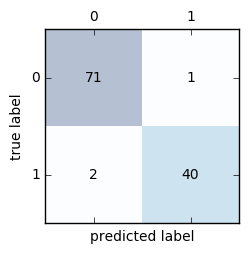

In [17]:
#计算混淆矩阵，正确率，错误率，精确率，召回率及F1-score

from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true = y_test,y_pred = y_pred)
#print(confmat)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
                s=confmat[i,j],
                va='center',ha='center') #画图时x是横轴，和矩阵表示行是i不同
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score

print('Precision:%.3f ' % precision_score(y_true=y_test,y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test,y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test,y_pred=y_pred))

Precision:0.976 
Recall: 0.952
F1: 0.964
